## Dataset: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe() #we get some numerical information like Total datapoints count, mean value, standard deviation value, 50 percentile value etc. for each numeric feature in our dataset. This will help us to understand the some basic statistic analysis of data.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.value_counts()

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
150  5.9            3.0           5.1            1.8           Iris-virginica     1
56   5.7            2.8           4.5            1.3           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
                                                                                 ..
100  5.7            2.8           4.1            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
97   5.7            2.9           4.2            1.3           Iris-versicolor    1
1    5.1            3.5           1.4            0.2           Iris-setosa       

In [7]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

#### As we saw that each classes (Species) has equal number of data points, So our Iris data said to be Balanced dataset. No Class is fully dominating in our dataset.

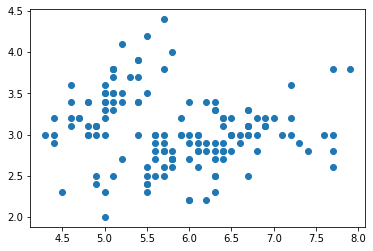

In [8]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.show()

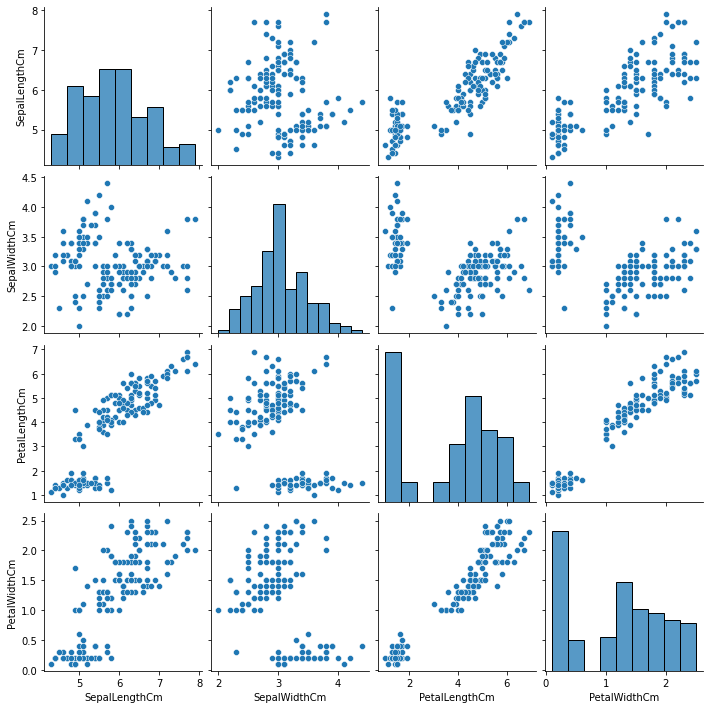

In [9]:
sns.pairplot(df.drop(['Id'],axis=1))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


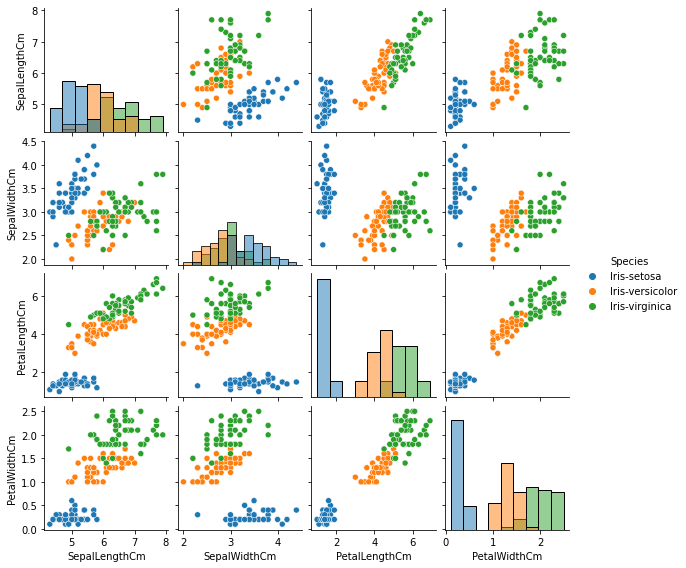

In [13]:
sns.pairplot(df.drop(['Id'],axis=1),hue="Species", diag_kind="hist", size=2)
plt.show()

####  Data Comparisons using Barplot

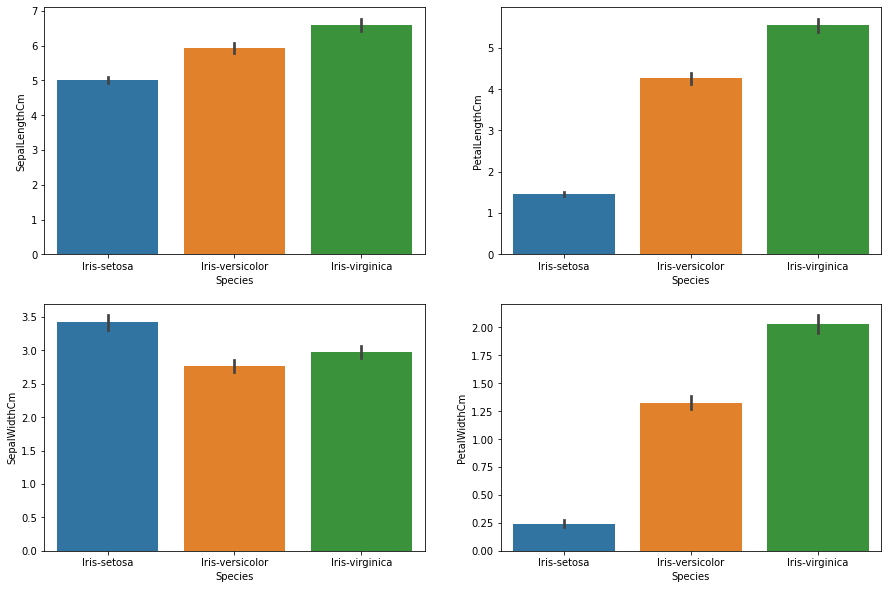

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Species', y = 'SepalLengthCm', data = df)
plt.subplot(2,2,2)
sns.barplot(x = 'Species', y = 'PetalLengthCm', data = df)
plt.subplot(2,2,3)
sns.barplot(x = 'Species', y = 'SepalWidthCm', data = df)
plt.subplot(2,2,4)
sns.barplot(x = 'Species', y = 'PetalWidthCm', data = df)

In [18]:
df.drop(['Id'],axis=1, inplace=True)

In [19]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


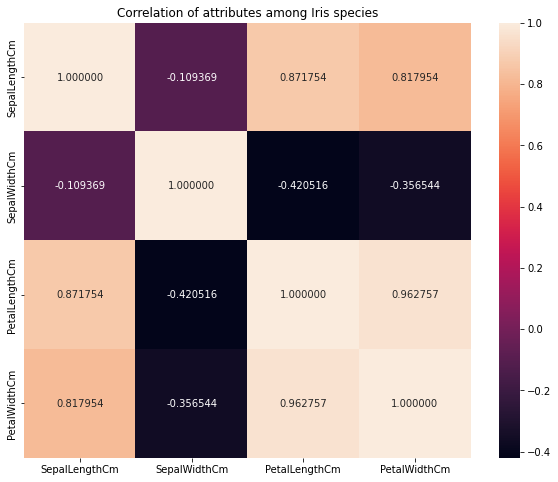

In [20]:
plt.subplots(figsize = (10,8))
sns.heatmap(df.corr(),annot=True,fmt="f").set_title("Correlation of attributes among Iris species")
plt.show()

## Building Classification Tree

[Text(200.88000000000002, 181.2, 'X[2] <= 4.9\ngini = 0.549\nsamples = 18\nvalue = [1, 8, 9]'),
 Text(133.92000000000002, 108.72, 'X[2] <= 2.7\ngini = 0.198\nsamples = 9\nvalue = [1, 8, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 9]')]

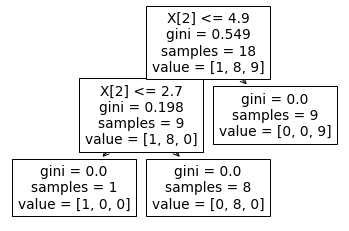

In [21]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

x= df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y= df['Species']
x_train,x_test, y_train, y_test= train_test_split(x,y,test_size=0.7,random_state=42)
xt,xc,yt,yc = train_test_split(x_train, y_train, test_size = 0.6, random_state=42)
clf= DecisionTreeClassifier(criterion='gini',min_samples_split=2)
clf.fit(xt,yt)
tree.plot_tree(clf)

### Validating our Decision tree using cross validation method to get the accuracy or performance score of our model.


In [22]:
print('Accuracy: ',cross_val_score(clf,xt,yt,cv=3,scoring='accuracy').mean())

Accuracy:  0.9444444444444445


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


In [23]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

yhat = clf.predict(xc)
print('Accuracy score for validation test data is:',accuracy_score(yc, yhat))
multilabel_confusion_matrix(yc , yhat)

Accuracy score for validation test data is: 0.8888888888888888


array([[[18,  0],
        [ 0,  9]],

       [[16,  2],
        [ 1,  8]],

       [[17,  1],
        [ 2,  7]]])

In [24]:
YT_hat = clf.predict(x_test)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(y_test, YT_hat)*100,'%')
multilabel_confusion_matrix(y_test , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 96.19047619047619 %


array([[[65,  0],
        [ 0, 40]],

       [[71,  1],
        [ 3, 30]],

       [[70,  3],
        [ 1, 31]]])

### Training model on Actual train data

[Text(200.88000000000002, 181.2, 'X[3] <= 1.55\ngini = 0.648\nsamples = 45\nvalue = [10, 17, 18]'),
 Text(133.92000000000002, 108.72, 'X[2] <= 2.5\ngini = 0.466\nsamples = 27\nvalue = [10, 17, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 17\nvalue = [0, 17, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 18]')]

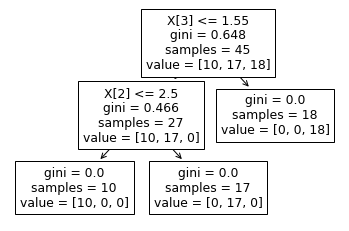

In [25]:
fclf=DecisionTreeClassifier(criterion='gini',min_samples_split=3)
fclf.fit(x_train,y_train)
tree.plot_tree(fclf)

### Checking the performance of model on Actual Test data

In [26]:
YT_Fhat = fclf.predict(x_test)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(y_test, YT_Fhat)*100,'%')
multilabel_confusion_matrix(y_test , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 92.38095238095238 %


array([[[65,  0],
        [ 0, 40]],

       [[69,  3],
        [ 5, 28]],

       [[68,  5],
        [ 3, 29]]])

In [27]:
#Testing for New points except from Dataset

Test_point = [[5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.5,3.0,1.1],
             [5.1,3.3,1.7,0.5],
             [6.0,2.7,5.1,1.6],
             [6.0,2.2,5.0,1.5]]

print(fclf.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor']
